In [1]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 9.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 2.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 7.4 MB/s eta 0:00:00:00:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import root_mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from scipy import stats

In [16]:
player_id = 355 
url_player = f'https://fantasy.premierleague.com/api/element-summary/{player_id}/'
api_result_player = requests.get(url_player).json()
stats = api_result_player['history']
df_stats = pd.json_normalize(stats)
df_stats.index = np.arange(1, len(df_stats) + 1)
features = ['opponent_team', 'was_home', 'minutes', 'total_points', 'goals_scored', 'assists', 'expected_goals', 'expected_assists']
df_stats.columns.values

# features = ['element', 'opponent_team', 'was_home', 'total_points']

array(['element', 'fixture', 'opponent_team', 'total_points', 'was_home',
       'kickoff_time', 'team_h_score', 'team_a_score', 'round', 'minutes',
       'goals_scored', 'assists', 'clean_sheets', 'goals_conceded',
       'own_goals', 'penalties_saved', 'penalties_missed', 'yellow_cards',
       'red_cards', 'saves', 'bonus', 'bps', 'influence', 'creativity',
       'threat', 'ict_index', 'starts', 'expected_goals',
       'expected_assists', 'expected_goal_involvements',
       'expected_goals_conceded', 'value', 'transfers_balance',
       'selected', 'transfers_in', 'transfers_out'], dtype=object)

In [17]:
df_stats = df_stats[features]
df_stats['avg_points'] = df_stats.total_points.rolling(window=3, closed = 'left', min_periods = 1).mean()

In [18]:
df_stats

,opponent_team,was_home,minutes,total_points,goals_scored,assists,expected_goals,expected_assists,avg_points
1,6,False,79,13,2,0,0.60,0.05,NaN
2,15,True,90,2,0,0,0.43,0.02,13.000000
3,17,False,90,4,1,0,1.93,0.01,7.500000
4,10,True,90,20,3,1,1.58,0.10,6.333333
5,19,False,90,6,1,0,2.56,0.03,8.666667
6,16,True,90,6,1,0,0.69,0.01,10.000000
7,20,False,90,2,0,0,0.06,0.03,10.666667
8,1,False,90,2,0,0,0.00,0.17,4.666667
9,5,True,90,8,1,0,0.26,0.00,3.333333
10,14,False,90,16,2,1,2.04,0.47,4.000000


In [19]:
df_stats.avg_points = df_stats.avg_points.fillna(1)

In [23]:
df_stats['avg_points'] = round(df_stats['avg_points'], 2)

In [24]:
df_stats

,opponent_team,was_home,minutes,total_points,goals_scored,assists,expected_goals,expected_assists,avg_points
1,6,False,79,13,2,0,0.60,0.05,1.00
2,15,True,90,2,0,0,0.43,0.02,13.00
3,17,False,90,4,1,0,1.93,0.01,7.50
4,10,True,90,20,3,1,1.58,0.10,6.33
5,19,False,90,6,1,0,2.56,0.03,8.67
6,16,True,90,6,1,0,0.69,0.01,10.00
7,20,False,90,2,0,0,0.06,0.03,10.67
8,1,False,90,2,0,0,0.00,0.17,4.67
9,5,True,90,8,1,0,0.26,0.00,3.33
10,14,False,90,16,2,1,2.04,0.47,4.00


In [25]:
X_train, X_test, y_train, y_test = train_test_split(df_stats[['avg_points']], df_stats['total_points'], test_size=0.3, random_state=0)

In [26]:
class MyBaselineEstimator(BaseEstimator, TransformerMixin):
    def __init__(self, column_name):
        self.column_name = column_name

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.column_name]

    def predict(self, X):
        return self.transform(X)

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipeline_champion = Pipeline([
    ('classifier', MyBaselineEstimator('avg_points')),
])
pipeline_challenger = Pipeline([
    ('LinearRegression', LinearRegression())
     ])

In [30]:
def compare_two_pipelines_performance(pipeline_champion, pipeline_challenger,
                                      X_train, X_test, y_train, y_test):
    # Train pipeline1
    pipeline_champion.fit(X_train, y_train)
    y_pred_champion = pipeline_champion.predict(X_test)
    # Train pipeline2
    pipeline_challenger.fit(X_train, y_train)
    y_pred_challenger = pipeline_challenger.predict(X_test)
    # Compute the accuracy of pipeline1
    champion_accuracy = root_mean_squared_error(y_test, y_pred_champion)
    # Compute the accuracy of pipeline2
    challenger_accuracy = root_mean_squared_error(y_test, y_pred_challenger)
    print(f"pipeline_champion accuracy: {champion_accuracy}")
    print(f"pipeline_challenger accuracy: {challenger_accuracy}")
    return champion_accuracy, challenger_accuracy

In [31]:
compare_two_pipelines_performance(pipeline_champion, pipeline_challenger, X_train, X_test, y_train, y_test)

pipeline_champion accuracy: 5.964144951290168
pipeline_challenger accuracy: 5.414548839703626


(5.964144951290168, 5.414548839703626)

In [98]:
###  TO DO: DODAĆ DO df_players_stats KOLUMNĘ avg_points A NASTĘPNIE WYKONAĆ PORÓWNANIE PIPELINE

In [81]:
# Let's create dataframe df_players_stats including all the data on players performance in each game
d = {'element': [], 'opponent_team': [], 'was_home': [], 'minutes': [],'total_points': [], 'goals_scored': [], 'assists': [], 'expected_goals': [], 'expected_assists': []}
df_players_stats = pd.DataFrame(d)
columns = ['element', 'opponent_team', 'was_home', 'minutes', 'total_points', 'goals_scored', 'assists', 'expected_goals', 'expected_assists']

for i in range(1, 839):
    url = f'https://fantasy.premierleague.com/api/element-summary/{i}/'
    try:
        api_result = requests.get(url).json()
        stats = api_result['history']
        df_stats = pd.json_normalize(stats)
        df_stats.index = np.arange(1, len(df_stats) + 1)
        df_stats = df_stats.reindex(columns=columns)
        df_stats['avg_minutes'] = df_stats.minutes.rolling(window=3, closed = 'left', min_periods = 1).mean()
        df_stats['avg_points'] = df_stats.total_points.rolling(window=3, closed = 'left', min_periods = 1).mean()
        df_stats['avg_goals'] = df_stats.goals_scored.rolling(window=3, closed = 'left', min_periods = 1).mean()
        df_stats['avg_xG'] = df_stats.expected_goals.rolling(window=3, closed = 'left', min_periods = 1).mean()
        df_stats['avg_assists'] = df_stats.assists.rolling(window=3, closed = 'left', min_periods = 1).mean()
        df_stats['avg_xA'] = df_stats.expected_assists.rolling(window=3, closed = 'left', min_periods = 1).mean()
        df_players_stats = pd.concat([df_players_stats, df_stats])
    except Exception as e:
        print(f'Error fetching data for player {i}: {e}')
        continue

df_players_stats.index = np.arange(1, len(df_players_stats) + 1)

Error fetching data for player 612: 'history'


In [82]:
# After creatuib of df_players_stats dataframe let's clean the data and prepare it for further predictions
df_players_stats.avg_points = df_players_stats.avg_points.fillna(1)
df_players_stats.avg_minutes = df_players_stats.avg_minutes.fillna(0)
df_players_stats.avg_goals = df_players_stats.avg_goals.fillna(0)
df_players_stats.avg_xG = df_players_stats.avg_xG.fillna(0)
df_players_stats.avg_assists = df_players_stats.avg_assists.fillna(0)
df_players_stats.avg_xA = df_players_stats.avg_xA.fillna(0)
df_players_stats['avg_points'] = round(df_players_stats['avg_points'], 2)
df_players_stats['avg_minutes'] = round(df_players_stats['avg_minutes'], 2)
df_players_stats['avg_goals'] = round(df_players_stats['avg_goals'], 2)
df_players_stats['avg_xG'] = round(df_players_stats['avg_xG'], 2)
df_players_stats['avg_assists'] = round(df_players_stats['avg_assists'], 2)
df_players_stats['avg_xA'] = round(df_players_stats['avg_xA'], 2)
df_players_stats['was_home'] = df_players_stats['was_home'].astype('bool')
df_players_stats['opponent_team'] = df_players_stats['opponent_team'].astype('int')
df_players_stats['opponent_team'] = df_players_stats['opponent_team'].astype('string')
df_players_stats['element'] = df_players_stats['element'].astype('int64')

df_players_stats.describe()

,element,minutes,total_points,goals_scored,assists,avg_minutes,avg_points,avg_goals,avg_xG,avg_assists,avg_xA
count,28709.000000,28709.000000,28709.000000,28709.000000,28709.000000,28709.000000,28709.000000,28709.000000,28709.000000,28709.000000,28709.000000
mean,390.530670,25.249399,1.054129,0.040127,0.035912,24.744730,1.060898,0.039101,0.039513,0.035027,0.024856
std,227.469389,37.515165,2.289895,0.219866,0.204278,34.369577,1.743372,0.145704,0.111755,0.130506,0.062664
min,1.000000,0.000000,-4.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,194.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,388.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,582.000000,66.000000,1.000000,0.000000,0.000000,54.330000,1.330000,0.000000,0.020000,0.000000,0.020000
max,838.000000,90.000000,26.000000,4.000000,4.000000,90.000000,17.000000,2.330000,2.020000,2.000000,0.940000


In [83]:
#Column 'elements' has to many values to be one hot encoded. Let's join the 'element_type' column from df_players table to group players by their position.
df_players = pd.read_csv('data dumps/df_players.csv')
df_players = df_players.rename(columns = {"id" : "element"})
df_players.set_index(['element'], inplace = True)
df_players_stats = df_players_stats.join(df_players['element_type'], on = 'element', how = 'left')
df_players_stats['element_type'] = df_players_stats['element_type'].astype('string')
df_players_stats

In [133]:
# Save dataframe to csv for future use
df_players_stats.to_csv(path_or_buf='df_players_stats.csv', index = False)

In [161]:
#Let's implement one hot encoding on the 'element_type' column
df_players_stats = pd.read_csv('df_players_stats.csv')
oh_element_type = pd.get_dummies(df_players_stats['element_type'])
df_players_stats.drop('element_type', axis = 1, inplace = True)
df_players_stats = df_players_stats.join(oh_element_type)
df_players_stats = df_players_stats.rename(columns = {1 : 'element_type_1', 2 : 'element_type_2', 3 : 'element_type_3', 4 : 'element_type_4'})
df_players_stats['element_type_1'] = df_players_stats['element_type_1'].astype('int64')
df_players_stats['element_type_2'] = df_players_stats['element_type_2'].astype('int64')
df_players_stats['element_type_3'] = df_players_stats['element_type_3'].astype('int64')
df_players_stats['element_type_4'] = df_players_stats['element_type_4'].astype('int64')

In [171]:
#Let's do the same for the 'opponent_team' column
oh_opponent_team = pd.get_dummies(df_players_stats['opponent_team'])
df_players_stats.drop('opponent_team', axis = 1, inplace = True)
df_players_stats = df_players_stats.join(oh_opponent_team)
for i in range (1,21):
    df_players_stats = df_players_stats.rename(columns = {i : 'opponent_' + f'{i}'})
for i in range (1,21):
    df_players_stats[f'opponent_{i}'] = df_players_stats[f'opponent_{i}'].astype('int64')

In [172]:
df_players_stats

,element,was_home,minutes,total_points,goals_scored,assists,expected_goals,expected_assists,avg_minutes,avg_points,...,opponent_11,opponent_12,opponent_13,opponent_14,opponent_15,opponent_16,opponent_17,opponent_18,opponent_19,opponent_20
0,1,True,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.00,...,0,0,0,0,0,1,0,0,0,0
1,1,False,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
2,1,True,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,1,True,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0,0,0,1,0,0,0,0,0,0
4,1,False,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28704,838,False,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
28705,838,True,5.0,1.0,0.0,0.0,0.0,0.0,0.00,0.00,...,0,0,0,0,0,0,0,1,0,0
28706,838,True,0.0,0.0,0.0,0.0,0.0,0.0,1.67,0.33,...,0,0,0,0,0,0,0,0,1,0
28707,838,False,0.0,0.0,0.0,0.0,0.0,0.0,1.67,0.33,...,0,0,0,0,0,1,0,0,0,0


In [174]:
df_players_stats['was_home'] = df_players_stats['was_home'].astype('int64')

In [ ]:
# Save dataframe to csv for future use
df_players_stats.to_csv(path_or_buf='df_players_stats_oh.csv', index = False)

In [21]:
#Let's drop non average columns and split the data before using the model

In [233]:
df_players_stats_oh = pd.read_csv('df_players_stats_oh.csv')
df_players_stats_oh['element'] = df_players_stats_oh['element'].astype('string')

In [234]:
df = df_players_stats_oh.drop(columns = ['minutes', 'element', 'goals_scored', 'assists', 'expected_goals', 'expected_assists']) #avg_minutes dropped based on the plots below, rmse dropped

In [235]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='total_points'), df['total_points'], test_size=0.2)

In [45]:
X_train.columns

Index(['element', 'was_home', 'avg_points', 'avg_goals', 'avg_xG',
       'avg_assists', 'avg_xA', 'element_type_1', 'element_type_2',
       'element_type_3', 'element_type_4', 'opponent_1', 'opponent_2',
       'opponent_3', 'opponent_4', 'opponent_5', 'opponent_6', 'opponent_7',
       'opponent_8', 'opponent_9', 'opponent_10', 'opponent_11', 'opponent_12',
       'opponent_13', 'opponent_14', 'opponent_15', 'opponent_16',
       'opponent_17', 'opponent_18', 'opponent_19', 'opponent_20'],
      dtype='object')

In [8]:
# Using GridSearchCV to find best parameters for RFR
gridsearch = GridSearchCV(estimator=RandomForestRegressor(),
                          param_grid={
                              'n_estimators': [25, 50, 100, 250],
                              'max_depth': [2, 3, 5, 10]
                          },
                          cv=3,
                          return_train_score=False,
                          scoring='r2')
gridsearch.fit(X=X_train, y=y_train)
pd.DataFrame(gridsearch.cv_results_).set_index('rank_test_score').sort_index()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score
rank_test_score,,,,,,,,,,,,
1,1.892680,0.073879,0.057533,0.004721,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.281954,0.254243,0.266052,0.267417,0.011354
2,4.792729,0.427798,0.096527,0.001939,5,250,"{'max_depth': 5, 'n_estimators': 250}",0.281095,0.253773,0.265948,0.266938,0.011176
3,8.690917,0.282247,0.206119,0.012260,10,250,"{'max_depth': 10, 'n_estimators': 250}",0.279187,0.251694,0.268344,0.266408,0.011307
4,0.967687,0.022187,0.042444,0.007805,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.280302,0.251858,0.265281,0.265814,0.011618
5,0.449101,0.003730,0.034704,0.005179,5,25,"{'max_depth': 5, 'n_estimators': 25}",0.280135,0.251830,0.265039,0.265668,0.011564
6,3.494631,0.200915,0.095849,0.022227,10,100,"{'max_depth': 10, 'n_estimators': 100}",0.276972,0.249505,0.264796,0.263758,0.011237
7,0.920522,0.025212,0.036219,0.001312,10,25,"{'max_depth': 10, 'n_estimators': 25}",0.274520,0.246330,0.265439,0.262096,0.011749
8,1.871537,0.175139,0.059146,0.015939,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.269800,0.246760,0.264722,0.260427,0.009884
9,0.350859,0.068715,0.026093,0.000797,3,25,"{'max_depth': 3, 'n_estimators': 25}",0.270070,0.244444,0.258666,0.257727,0.010483


In [75]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=250, max_depth = 5, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=250, oob_score=True,
                      random_state=0)

In [76]:
predictions = regressor.predict(X_test)
# Evaluating the model
rmse = root_mean_squared_error(y_test, predictions)
print(f'Root Mean Squared Error: {rmse}') 
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Root Mean Squared Error: 1.9703762486424
R-squared: 0.2597886010213569


In [35]:
df = pd.read_csv('df_players_stats.csv')
df.columns

Index(['element', 'opponent_team', 'was_home', 'minutes', 'total_points',
       'goals_scored', 'assists', 'expected_goals', 'expected_assists',
       'avg_minutes', 'avg_points', 'avg_goals', 'avg_xG', 'avg_assists',
       'avg_xA', 'element_type'],
      dtype='object')

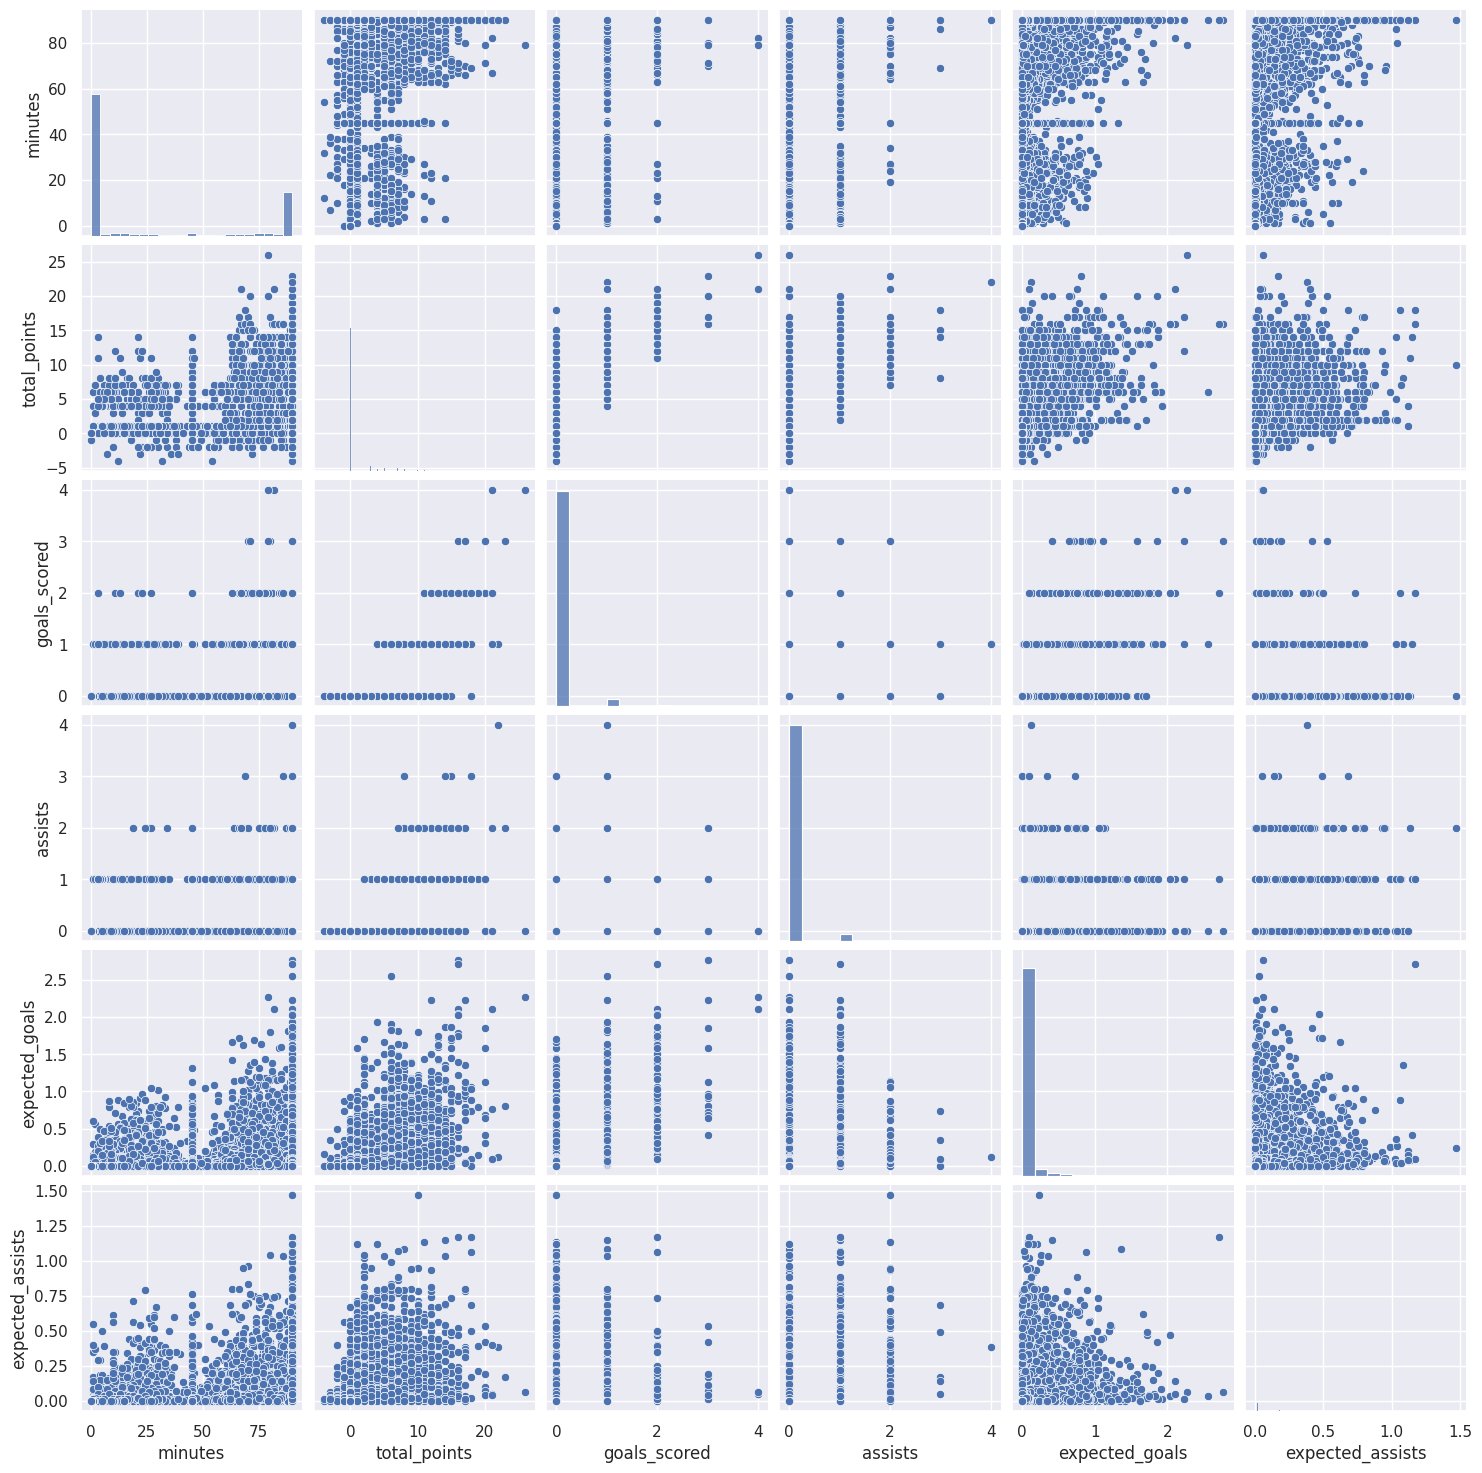

In [37]:
sns.set()
cols = ['minutes', 'total_points', 'goals_scored', 'assists', 'expected_goals', 'expected_assists']
sns.pairplot(df[cols])

<Axes: xlabel='expected_goals', ylabel='total_points'>

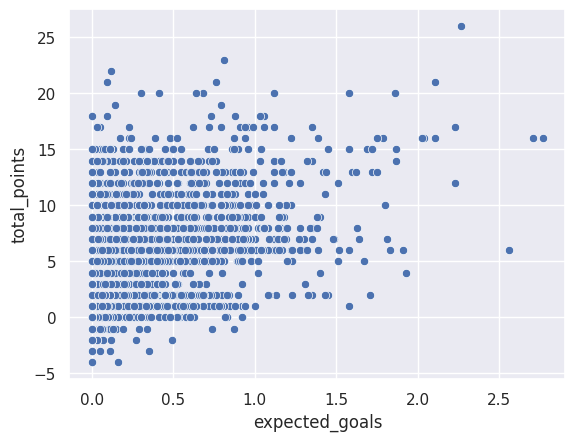

In [38]:
sns.scatterplot(data = df, x = df.expected_goals, y = df.total_points)

<Axes: xlabel='goals_scored', ylabel='total_points'>

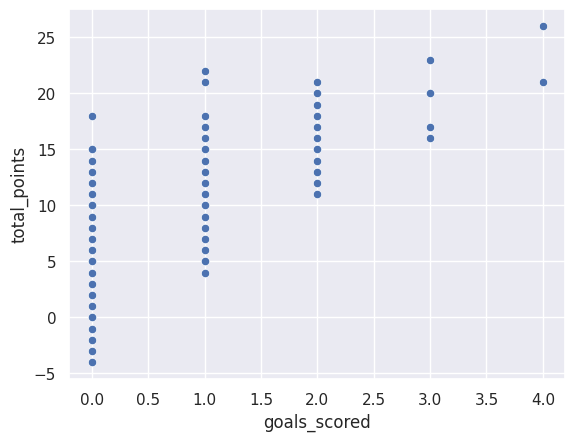

In [40]:
sns.scatterplot(data = df, x = df.goals_scored, y = df.total_points)

<Axes: xlabel='minutes', ylabel='total_points'>

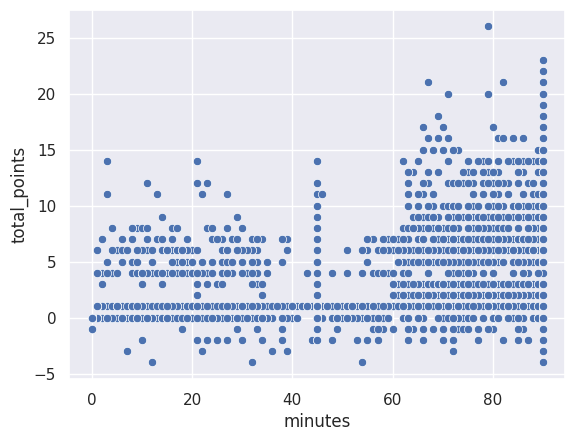

In [41]:
sns.scatterplot(data = df, x = df.minutes, y = df.total_points)

In [ ]:
#Let's check what dropping players with 0 xG does

In [107]:
import random

In [236]:
X_train['indeces_to_remove'] = [1 if (x == 0 and random.random() < 0.7) else 0 for x in X_train["avg_xG"]]

In [237]:
y_train = y_train[X_train['indeces_to_remove'] == 0]

In [238]:
X_train = X_train[X_train['indeces_to_remove'] == 0]

In [242]:
X_train = X_train.drop(columns = ['indeces_to_remove'])

In [243]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=250, max_depth = 5, random_state=0, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=250, oob_score=True,
                      random_state=0)

In [244]:
predictions = regressor.predict(X_test)
# Evaluating the model
rmse = root_mean_squared_error(y_test, predictions)
print(f'Root Mean Squared Error: {rmse}') 
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Root Mean Squared Error: 1.942900547699149
R-squared: 0.2681190748607113


In [245]:
#TODO: Dodać kolumnę clean sheets. Zamiast opponents oh zrobić kolumnę 'opponent difficulty' najlepiej od razu przeskalowaną od 0 do 1. 